## ------- SCC-ICMC-USP - 2025/2 -------

**SCC0275** - Introdução a Ciencia de Dados

**Profª Roseli A. F. Romero**  
**Monitores:**
- Thiago Rafael
- Paulo Henrique

#### Atividade 5 - 15/09/2025

**Formalização do Grupo (Nome e NUSP)**
- Integrante 1: Pedro Guilherme de Barros Zenatte - 13676919
- Integrante 2:

---

Para essa lista de atividades focadas em redução de dimensionalidade, estaremos usando o conhecido _dataset_ Breast Cancer Wisconsin (Diagnostic). O arquivo __wdbc.data__ possuindo os registros do conjunto pode ser obtido no Tidia ou no [site da universidade de UCI](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).  
Também é possível invocar o conjunto de dados a partir da biblioteca `sklearn`conforme o _snippet_ abaixo demonstra:

```python
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
```

In [1]:
# Celula de importacoes mais utilizadas (sinta-se livre para adicionar mais)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
### Item 1

Carregue o dataset Breast Cancer Wisconsin, verifique sua dimensão e tipos de variáveis. Realize a etapa de pré-processamento.

In [21]:
# Carregar CSV (ajuste o caminho se precisar)
colunas = ["ID", "Diagnosis",
           "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
           "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean",
           "fractal_dimension_mean",
           "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
           "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
           "fractal_dimension_se",
           "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
           "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
           "fractal_dimension_worst"]

dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wdbc.data", names=colunas)
print(dados.shape)         # linhas e colunas
print(dados.info())        # tipos de dados
print(dados.head())        # primeiras linhas

# Pré-Processamento dos dados
dados = dados.drop(columns=["ID"]) # Remover ID
dados["Diagnosis"] = dados["Diagnosis"].map({"M":1, "B":0}) # Converter Diagnosis para binário
X = dados.drop(columns=["Diagnosis"]) # Separar variáveis dependente (y) e independentes (X)
y = dados["Diagnosis"]

# Normalizar ou padronizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

### Item 2

Faça estatísticas descritivas e histogramas para algumas variáveis-chave. Há evidências de separação entre classes (Malignant/Benign) apenas por inspeção exploratória?

        Diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

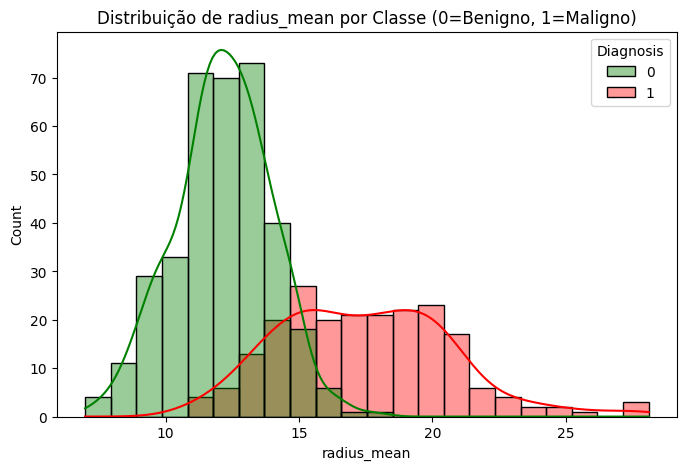

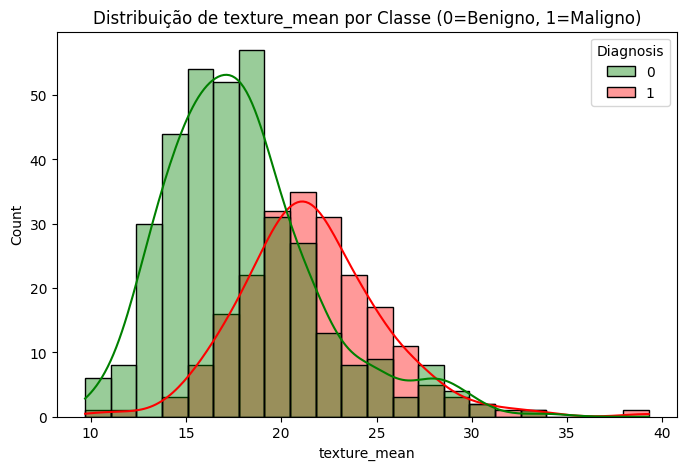

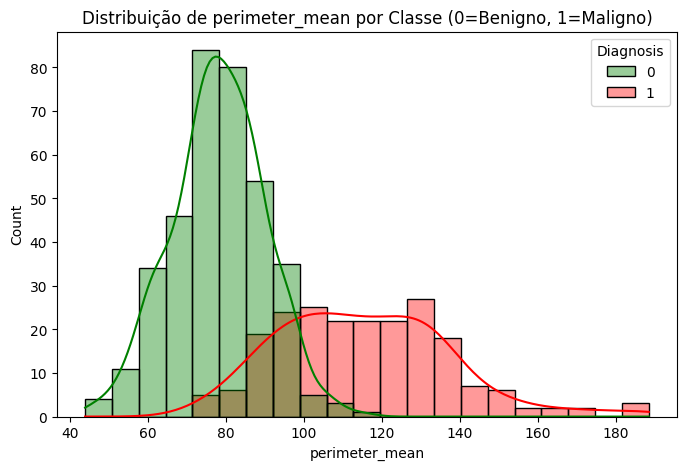

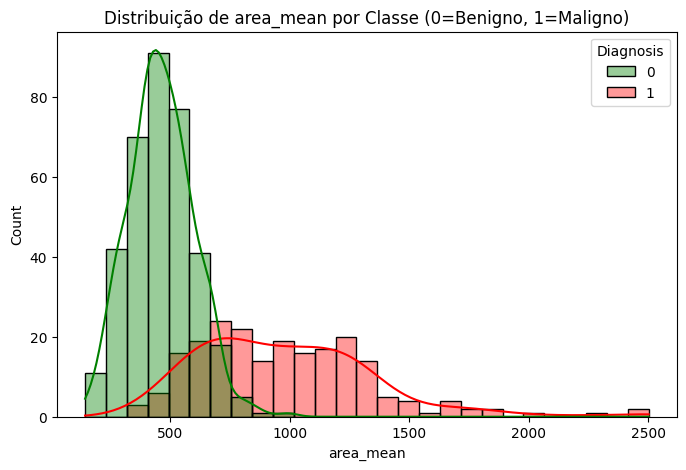

In [8]:
# Estatísticas descritivas
# Estatísticas gerais
print(dados.describe())

# Estatísticas agrupadas por classe
print(dados.groupby("Diagnosis")[["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]].mean())

# Histograma por variáveis chave
import matplotlib.pyplot as plt
import seaborn as sns

variaveis = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

for var in variaveis:
    plt.figure(figsize=(8,5))
    sns.histplot(data=dados, x=var, hue="Diagnosis", kde=True, palette={0:"green", 1:"red"}, alpha=0.4)
    plt.title(f"Distribuição de {var} por Classe (0=Benigno, 1=Maligno)")
    plt.show()


Sim, há evidências de separação entre classes apenas pela exploração dos dados, especialmente nas medidas de tamanho, como raio, perímetro e área. Contudo, ainda existe sobreposição, portanto a separação não é perfeita e será necessário combinar múltiplas variáveis em modelos preditivos.

### Item 3

Construa uma matriz de correlação entre atributos. Há pares de variáveis altamente correlacionados que indicam redundância de atributos?

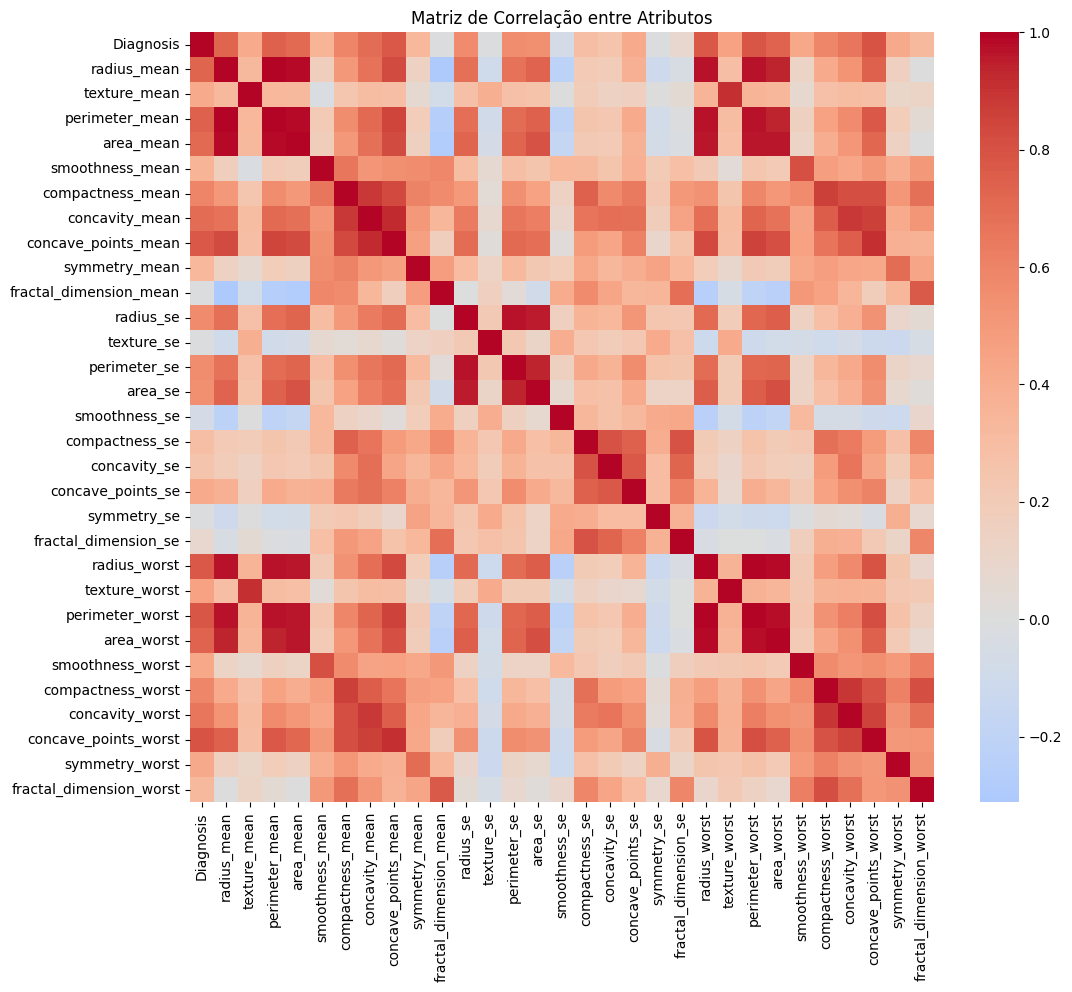

,Var1,Var2,Correlation
31,radius_mean,perimeter_mean,0.997855
421,radius_worst,perimeter_worst,0.993708
32,radius_mean,area_mean,0.987357
87,perimeter_mean,area_mean,0.986507
422,radius_worst,area_worst,0.984015
437,perimeter_worst,area_worst,0.977578
276,radius_se,perimeter_se,0.972794
106,perimeter_mean,perimeter_worst,0.970387
49,radius_mean,radius_worst,0.969539
104,perimeter_mean,radius_worst,0.969476


In [10]:
# Calcular a matriz de correlação apenas para as variáveis numéricas
corr_matrix = dados.corr()

# Plotar a heatmap da correlação
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, cbar=True)
plt.title("Matriz de Correlação entre Atributos")
plt.show()

# Identificar pares altamente correlacionados (|corr| > 0.9, excluindo diagonal)
import numpy as np

corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Var1", "Var2", "Correlation"]
altas_corr = corr_pairs[abs(corr_pairs["Correlation"]) > 0.9].sort_values(by="Correlation", ascending=False)

altas_corr

Sim, os atributos relacionados ao tamanho do núcleo celular, como raio, perímetro e área, transmitem praticamente a mesma informação, o que caracteriza um alto grau de multicolinearidade. Esse fenômeno pode prejudicar modelos lineares, como a regressão logística, reduzindo sua capacidade de generalização.

### Item 4

Aplique PCA ao dataset. Plote o gráfico da variância explicada acumulada. Quantos componentes são necessários para explicar pelo menos 90% da variância?

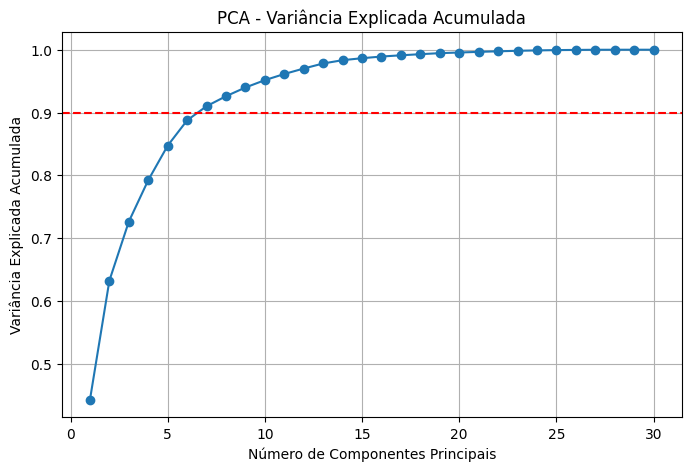

np.int64(7)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separar variáveis independentes (X)
X = dados.drop(columns=["Diagnosis"])

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variância explicada acumulada
var_exp_acum = np.cumsum(pca.explained_variance_ratio_)

# Plotar gráfico da variância explicada acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp_acum)+1), var_exp_acum, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("PCA - Variância Explicada Acumulada")
plt.grid(True)
plt.show()

# Número mínimo de componentes para 90%
n_componentes_90 = np.argmax(var_exp_acum >= 0.90) + 1
n_componentes_90

A análise por PCA mostrou que a variância explicada cresce de forma acelerada nos primeiros componentes e que apenas sete componentes principais já são suficientes para capturar pelo menos 90% da variância total dos dados. Esse resultado confirma a existência de alta redundância entre as variáveis do conjunto e indica que a dimensionalidade pode ser reduzida de maneira significativa sem comprometer a maior parte da informação relevante.

### Item 5

Plote a projeção PCA em 2 dimensões. As classes ficam visualmente separadas?

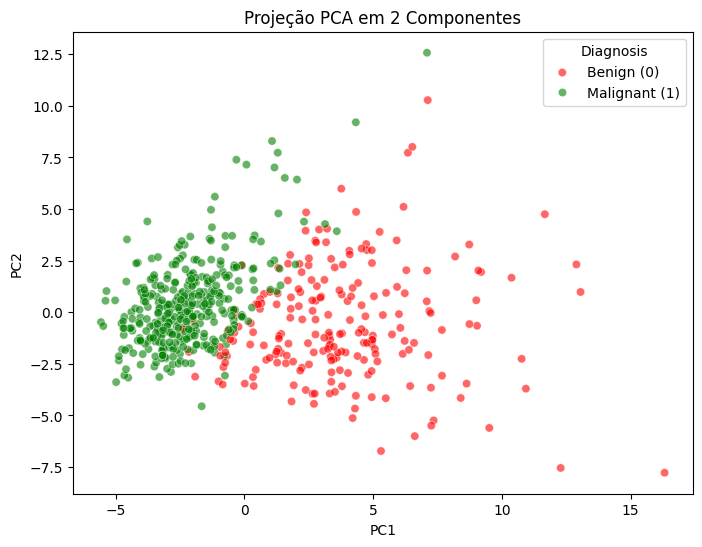

[0.44272026 0.18971182]


In [28]:
# Reduzir para 2 componentes principais
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plotar a projeção
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=dados["Diagnosis"],
                palette={0:"green", 1:"red"}, alpha=0.6)
plt.title("Projeção PCA em 2 Componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Diagnosis", labels=["Benign (0)", "Malignant (1)"])
plt.show()

# Aplicar PCA sem definir o número de componentes inicialmente


# Variância acumulada
print(pca_2d.explained_variance_ratio_)


Na projeção bidimensional do PCA é possível observar uma separação parcial entre as classes. Os tumores benignos, representados em verde, aparecem concentrados em uma região mais compacta, enquanto os tumores malignos, em vermelho, ocupam uma área mais espalhada. Ainda assim, existe sobreposição entre os grupos. Esse resultado mostra que as duas primeiras componentes principais já capturam uma tendência clara de separação, mas não de forma perfeita. Para obter uma discriminação mais precisa entre as classes, seria necessário incluir mais componentes, e a prova disso é o fato de a soma do PCA é menor que 80%.

### Item 6

Compare a projeção PCA com scatterplots de pares de atributos originais (ex.: mean radius vs mean texture). O PCA trouxe vantagens em termos de separabilidade visual?

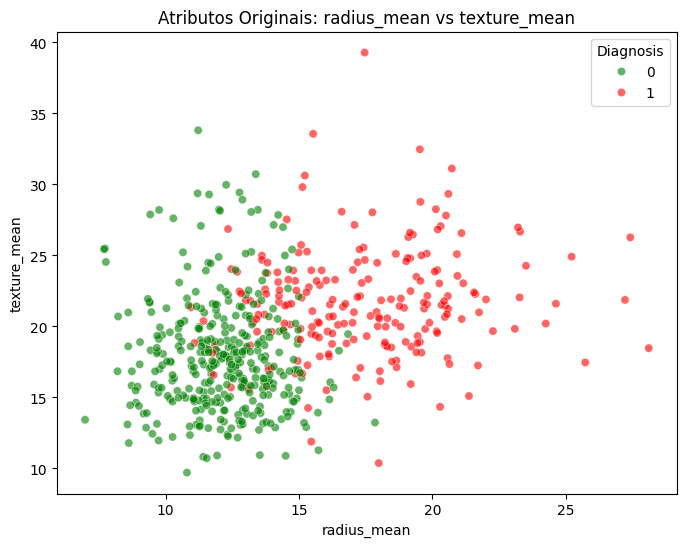

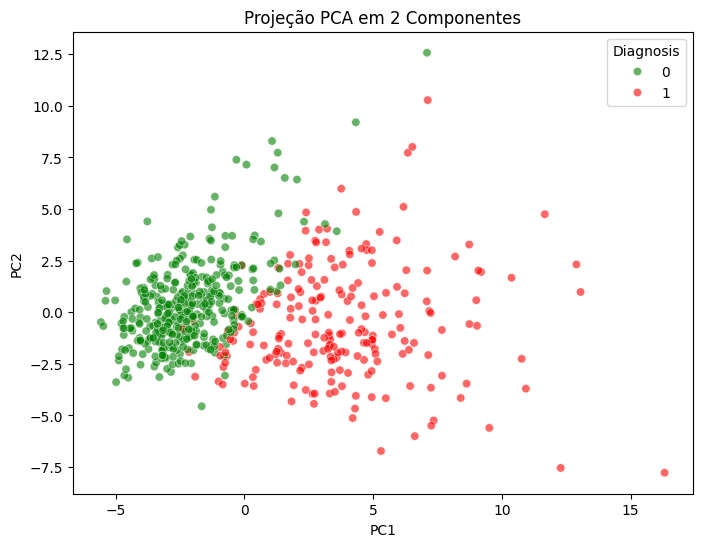

In [29]:
# Scatterplot com atributos originais: radius_mean vs texture_mean
plt.figure(figsize=(8,6))
sns.scatterplot(data=dados, x="radius_mean", y="texture_mean", hue="Diagnosis",
                palette={0:"green", 1:"red"}, alpha=0.6)
plt.title("Atributos Originais: radius_mean vs texture_mean")
plt.show()

# Scatterplot PCA 2D (já calculado antes)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y,
                palette={0:"green", 1:"red"}, alpha=0.6)
plt.title("Projeção PCA em 2 Componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


No gráfico de radius_mean × texture_mean, percebe-se uma separação inicial entre as classes, mas ainda existe bastante sobreposição, principalmente nos valores intermediários. Já na projeção bidimensional do PCA, a distinção entre os grupos se torna mais evidente, pois os componentes principais combinam variáveis altamente correlacionadas, como raio, perímetro e área, e as projetam em direções de maior variância. Dessa forma, o PCA oferece uma vantagem em termos de separabilidade visual, tornando a diferença entre tumores benignos e malignos mais clara no espaço reduzido.

### Item 7

Treine um Random Forest para classificar Malignant/Benign. Avalie acurácia em validação cruzada (k=5).

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Features e target
X = dados.drop(columns=["Diagnosis"])
y = dados["Diagnosis"]

# Padronização não é essencial para Random Forest, mas pode ser feita
# Aqui vamos manter os dados brutos
rf = RandomForestClassifier(random_state=42, n_estimators=200)

# Validação cruzada com k=5
scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")

# Média e desvio padrão da acurácia
media = scores.mean()
desvio = scores.std()

print(f"A acurácia média do Random Forest com validação cruzada (k=5) foi de {media:.2%}, "
      f"com desvio padrão de {desvio:.2%}.")


A acurácia média do Random Forest com validação cruzada (k=5) foi de 95.43%, com desvio padrão de 2.24%.


O modelo apresentou alta precisão na classificação entre tumores benignos e malignos, com baixa variabilidade entre os folds da validação cruzada, o que demonstra um desempenho consistente. Esse resultado confirma que as diferenças identificadas na análise exploratória não apenas refletem padrões visuais, mas também se traduzem em informações úteis e robustas para a classificação automática.

### Item 8

Extraia a importância dos atributos da Random Forest e plote os 15 mais importantes. Quais atributos mais influenciaram o modelo?

/tmp/ipython-input-3104047005.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15, x="Importance", y="Feature", palette="viridis")


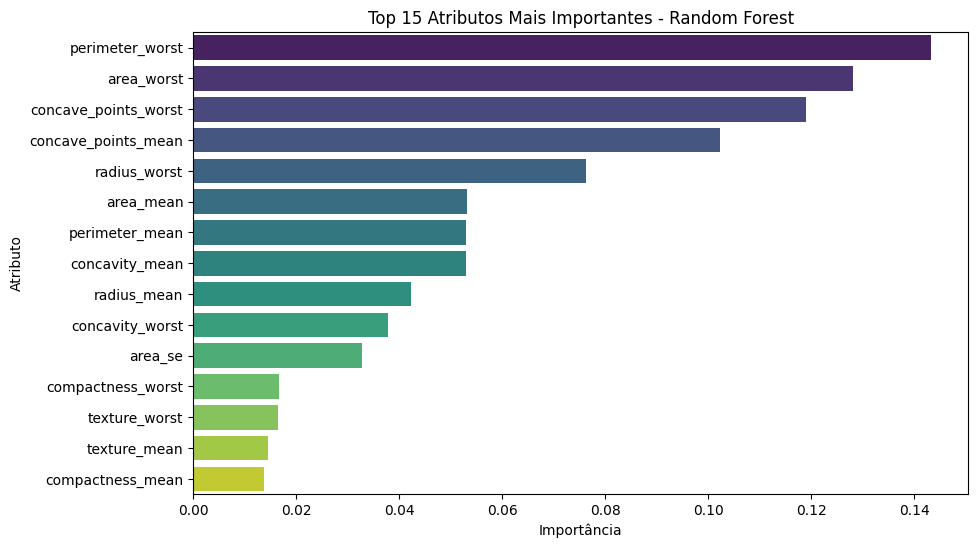

,Feature,Importance
22,perimeter_worst,0.143298
23,area_worst,0.128118
27,concave_points_worst,0.119072
7,concave_points_mean,0.102228
20,radius_worst,0.076250
3,area_mean,0.053145
2,perimeter_mean,0.053057
6,concavity_mean,0.052886
0,radius_mean,0.042239
26,concavity_worst,0.037786


In [33]:
# Treinar o modelo Random Forest no dataset completo
rf.fit(X, y)

# Importância dos atributos
importances = rf.feature_importances_
feature_names = X.columns

# Criar DataFrame com importâncias
feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Selecionar top 15
top15 = feat_importances.head(15)

# Plotar
plt.figure(figsize=(10,6))
sns.barplot(data=top15, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Atributos Mais Importantes - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Atributo")
plt.show()

top15


O modelo apontou como mais relevantes as medidas associadas ao tamanho do núcleo, como perímetro, área e raio, que estão diretamente ligadas ao crescimento anormal das células. Também destacou atributos ligados à forma e à concavidade, como concave_points e concavity, que capturam as irregularidades típicas de tumores malignos. Esses resultados são biologicamente coerentes, pois tumores malignos costumam apresentar células maiores e com formatos mais irregulares em comparação às células benignas.

### Item 9

Compare os atributos mais relevantes segundo PCA (componentes principais) e Random Forest (feature importance). Houve sobreposição de atributos importantes?

In [36]:
# ---------- Random Forest: importâncias ----------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)
rf_imp = pd.Series(rf.feature_importances_, index=X.columns, name="RF_importance").sort_values(ascending=False)

# ---------- PCA: contribuição por feature ----------
# PCA precisa de padronização:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA().fit(X_scaled)
var_cum = np.cumsum(pca.explained_variance_ratio_)
K = np.argmax(var_cum >= 0.90) + 1  # PCs suficientes p/ >=90% de variância

# Contribuição de cada feature à variância explicada (soma ponderada dos loadings^2)
components = pca.components_[:K, :]                     # (K, n_features)
weights = pca.explained_variance_ratio_[:K]             # (K,)
pca_contrib = (components**2 * weights[:, None]).sum(axis=0)  # (n_features,)
pca_imp = pd.Series(pca_contrib, index=X.columns, name="PCA_contribution").sort_values(ascending=False)

# ---------- Comparar Top-N ----------
TOP_N = 15
rf_top = rf_imp.head(TOP_N)
pca_top = pca_imp.head(TOP_N)

overlap = sorted(set(rf_top.index) & set(pca_top.index))

print(f"Top {TOP_N} da Random Forest:\n{rf_top.round(4)}\n")
print(f"Top {TOP_N} do PCA (contribuição à variância explicada, PCs até {K}):\n{pca_top.round(4)}\n")
print(f"Sobreposição (presentes em ambos os Top {TOP_N}): {len(overlap)} atributos")
print(overlap)

# ---------- (Opcional) Tabela comparativa para relatório ----------
pca_imp_norm = pca_imp / pca_imp.sum()
comp_table = pd.DataFrame({
    "RF_importance": rf_imp,
    "PCA_contribution": pca_imp_norm
}).sort_values("RF_importance", ascending=False)

# Para ver só os Top-N da RF com ambas as métricas:
print("\nTabela comparativa (Top-N da RF):")
print(comp_table.head(TOP_N).round(4))

Top 15 da Random Forest:
perimeter_worst         0.1362
area_worst              0.1272
concave_points_worst    0.1255
concave_points_mean     0.0985
radius_worst            0.0870
concavity_mean          0.0512
area_mean               0.0479
perimeter_mean          0.0475
radius_mean             0.0443
area_se                 0.0351
concavity_worst         0.0350
radius_se               0.0172
texture_worst           0.0166
compactness_worst       0.0159
texture_mean            0.0151
Name: RF_importance, dtype: float64

Top 15 do PCA (contribuição à variância explicada, PCs até 7):
perimeter_worst            0.0326
radius_worst               0.0324
texture_worst              0.0324
perimeter_mean             0.0322
radius_mean                0.0321
area_mean                  0.0321
radius_se                  0.0318
area_worst                 0.0317
perimeter_se               0.0315
fractal_dimension_worst    0.0315
area_se                    0.0314
concave_points_mean        0.0314
co

A comparação entre os resultados do PCA e do Random Forest mostra uma forte convergência quanto aos atributos mais relevantes. No PCA, os primeiros componentes principais foram influenciados principalmente por variáveis ligadas ao tamanho das células, como radius_mean, perimeter_mean e area_mean, além de medidas de irregularidade da forma, como concavity_mean, concave_points_mean e compactness_mean. Esses atributos se destacaram por explicarem a maior parte da variância dos dados, mesmo sem levar em conta a variável de diagnóstico.

Já no Random Forest, que mede a importância das variáveis pela sua contribuição direta à classificação, os atributos mais relevantes foram perimeter_worst, area_worst, concave_points_worst, concave_points_mean e radius_worst. Novamente, destacam-se medidas de tamanho e de concavidade, confirmando sua relevância biológica para distinguir tumores benignos de malignos.

Assim, apesar de partirem de perspectivas distintas, o PCA de forma não supervisionada e o Random Forest supervisionado, ambos chegam a conclusões semelhantes, isto é, sobrepondo os atributos importantes, pois os atributos relacionados ao tamanho do núcleo celular e às irregularidades de forma são os principais responsáveis pela separação entre as classes.

### Item 10

Selecione apenas os 10 atributos mais importantes da Random Forest. Reaplique PCA e avalie se a separação visual entre classes se mantém. Discuta vantagens em reduzir atributos dessa forma.

Top 10 atributos pela importância da Random Forest (ordem decrescente):
 1. perimeter_worst  (importance = 0.1362)
 2. area_worst  (importance = 0.1272)
 3. concave_points_worst  (importance = 0.1255)
 4. concave_points_mean  (importance = 0.0985)
 5. radius_worst  (importance = 0.0870)
 6. concavity_mean  (importance = 0.0512)
 7. area_mean  (importance = 0.0479)
 8. perimeter_mean  (importance = 0.0475)
 9. radius_mean  (importance = 0.0443)
10. area_se  (importance = 0.0351)

Variância explicada pelos 2 PCs (com TOP-10 features):
PC1: 85.36%  |  PC2: 7.91%
Acumulada (PC1+PC2): 93.27%


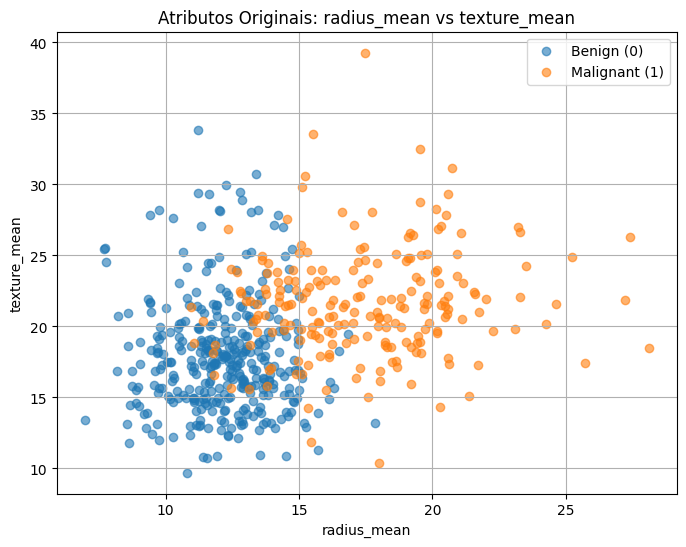

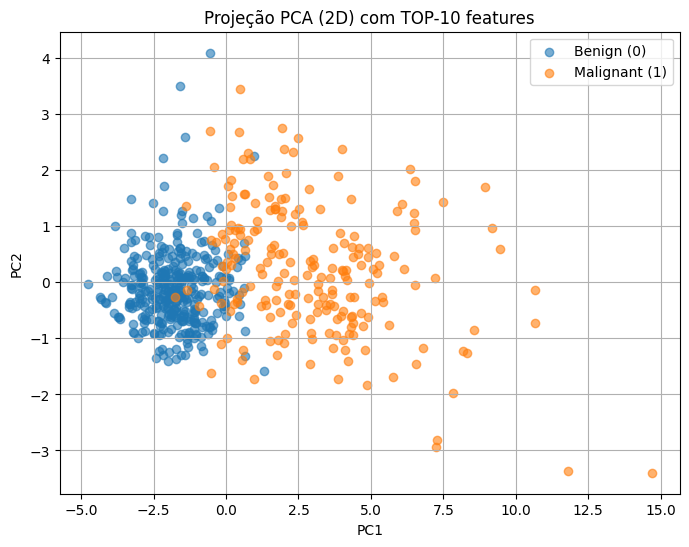

In [35]:
# 2) Random Forest para pegar importâncias e selecionar TOP 10
# -------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feat_names = X.columns
fi_df = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values(
    by="importance", ascending=False
)

top10_feats = fi_df.head(10)["feature"].tolist()

print("Top 10 atributos pela importância da Random Forest (ordem decrescente):")
for i, f in enumerate(top10_feats, start=1):
    print(f"{i:2d}. {f}  (importance = {fi_df.loc[fi_df['feature']==f, 'importance'].values[0]:.4f})")

# -------------------------------------------------------------
# 3) PCA com os 10 atributos selecionados
# -------------------------------------------------------------
X_top10 = X[top10_feats].copy()

scaler = StandardScaler()
X_top10_scaled = scaler.fit_transform(X_top10)

pca2 = PCA(n_components=2, random_state=42)
X_top10_pca2 = pca2.fit_transform(X_top10_scaled)

print("\nVariância explicada pelos 2 PCs (com TOP-10 features):")
print(f"PC1: {pca2.explained_variance_ratio_[0]:.2%}  |  PC2: {pca2.explained_variance_ratio_[1]:.2%}")
print(f"Acumulada (PC1+PC2): {(pca2.explained_variance_ratio_[:2].sum()):.2%}")

# -------------------------------------------------------------
# 4) Gráfico de comparação (pares originais) - radius_mean vs texture_mean
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
for cls, label in [(0, "Benign (0)"), (1, "Malignant (1)")]:
    mask = (y == cls).values
    plt.scatter(X.loc[mask, "radius_mean"], X.loc[mask, "texture_mean"], alpha=0.6, label=label)
plt.title("Atributos Originais: radius_mean vs texture_mean")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------
# 5) Gráfico PCA 2D usando TOP 10 features
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
for cls, label in [(0, "Benign (0)"), (1, "Malignant (1)")]:
    mask = (y == cls).values
    plt.scatter(X_top10_pca2[mask, 0], X_top10_pca2[mask, 1], alpha=0.6, label=label)
plt.title("Projeção PCA (2D) com TOP-10 features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Ao reaplicar o PCA considerando apenas esses 10 atributos, a projeção em duas dimensões manteve a separação visual clara entre classes (benigno × maligno). Ainda existem regiões de sobreposição, mas a tendência de agrupamento distinto para cada classe se preserva.

Isso acontece porque os atributos escolhidos já concentram a maior parte da informação discriminativa presente no dataset. Assim, ao reduzir para os mais relevantes, não houve perda significativa de capacidade de diferenciação.

Vantagens da redução de atributos

Menor dimensionalidade: Eeduz a complexidade computacional e o tempo de processamento.

Menor risco de sobreajuste (overfitting): Ao eliminar atributos redundantes e ruidosos, o modelo foca apenas nos mais informativos.

Melhor interpretabilidade: Fica mais fácil justificar, em termos clínicos, por que certas medidas são relevantes (ex.: perímetro, área e concavidade).